![](images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, © Carlos A. Iglesias

## [Introduction to  Network Analysis](0_Intro_Network_Analysis.ipynb)

# Social Networks

In [1]:
# from networkx documentation
# Plot degree distribution 

import collections
import matplotlib.pyplot as plt

# We convert first the graph from directed to undirected

def plot_degree_histogram(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)
    plt.show()

## Regular graph

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# from Think Complexity
def adjacent_edges(nodes, halfk):
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v
        
def make_ring_lattice(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G



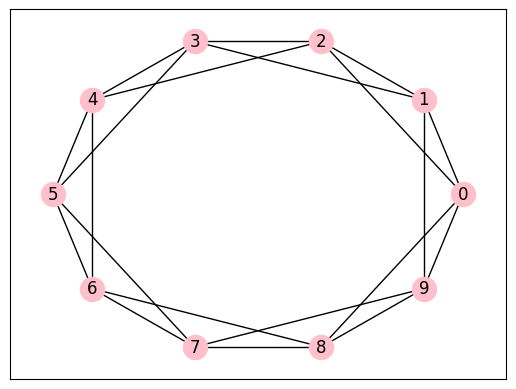

In [3]:
L = make_ring_lattice(10,4)
pos = nx.circular_layout(L)
nx.draw_networkx(L, pos=pos, with_labels=True, node_size=300, node_color='pink')

In [4]:
#Average shortest path
nx.average_shortest_path_length(L)

1.6666666666666667

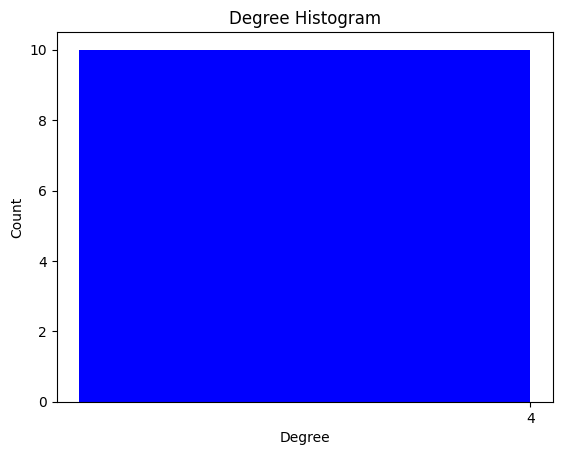

In [5]:
plot_degree_histogram(L)

## Erdős–Rényi Random Graph

In [6]:
n = 10
p1 = np.log(n) / n
p1

0.23025850929940456

False

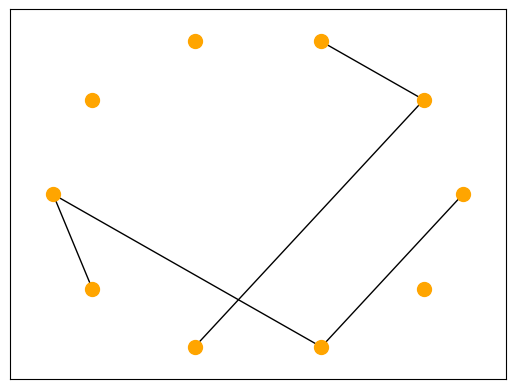

In [7]:
## n: number of nodes and p: probability

ER1 = nx.erdos_renyi_graph(n, 0.1)

pos = nx.circular_layout(ER1)
nx.draw_networkx(ER1, pos=pos, with_labels=False, node_size=100, node_color='orange')
nx.is_connected(ER1)

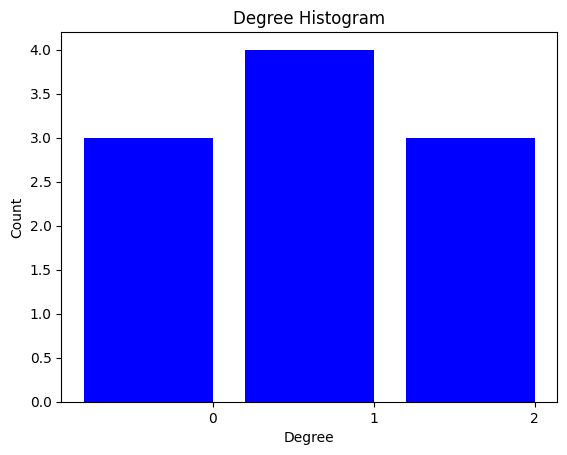

In [8]:
plot_degree_histogram(ER1)

True

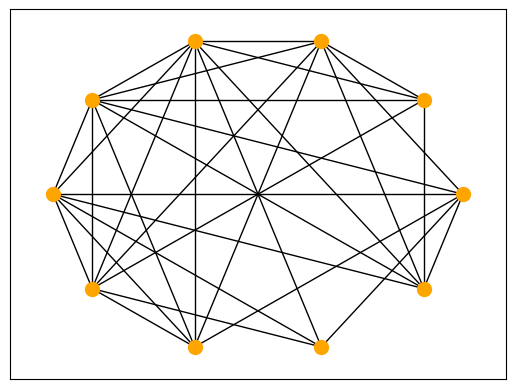

In [9]:
ER2 = nx.erdos_renyi_graph(10, 0.6) 

pos = nx.circular_layout(ER1)
nx.draw_networkx(ER2, pos=pos, with_labels=False, node_size=100, node_color='orange')
nx.is_connected(ER2)

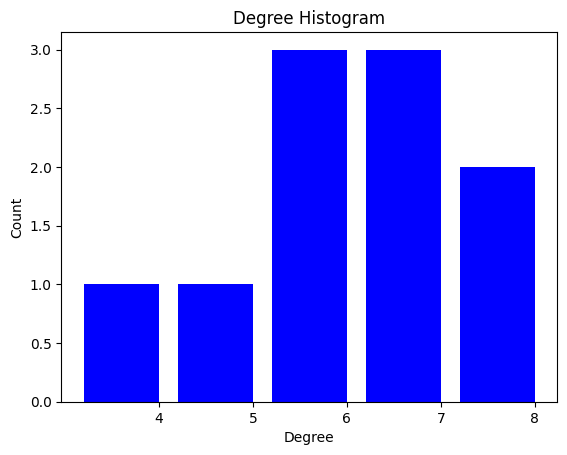

In [10]:
plot_degree_histogram(ER2)

## Small world. Watts-Strogatz (WS) graphs

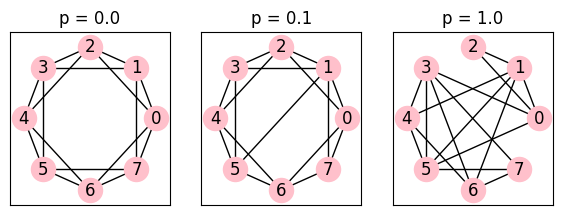

In [11]:
plt.figure(figsize=(7, 2.25))
for i, p in enumerate([0.0, 0.1, 1.0]):
    # Generate the graph: n: number of nodes;  k: neighbours, p: prob of rewiring an edge
    G = nx.watts_strogatz_graph(8, 4, p)
    # Create layout and draw
    plt.subplot(1, 3, i + 1)
    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos=pos, node_color='pink')
    plt.title("p = {:0.1f}".format(p))

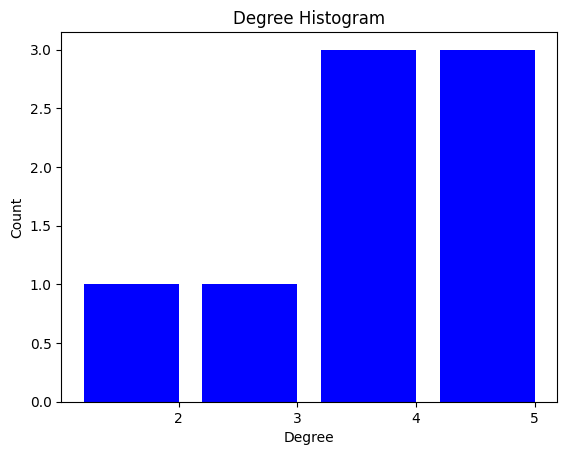

In [12]:
plot_degree_histogram(G)

## Barabasi-Albert Model

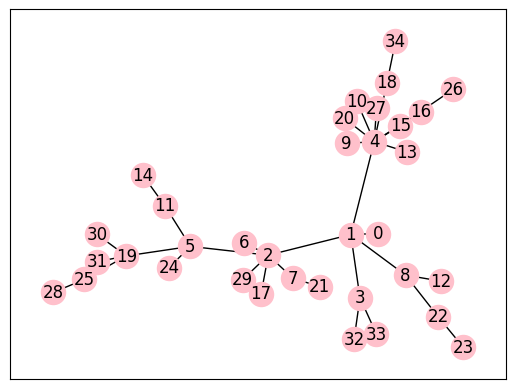

In [13]:
G_preferential_35 = nx.barabasi_albert_graph(35, 1)
pos = nx.spring_layout(G_preferential_35, k=0.1)
nx.draw_networkx(G_preferential_35, pos, node_color='pink')

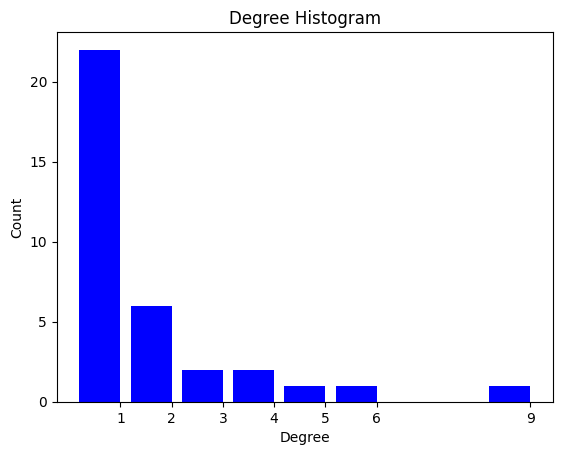

In [14]:
plot_degree_histogram(G_preferential_35)

## Example Barabasi

In [15]:
# n = 1000 nodes and m = 2 minimum degree
BA = nx.barabasi_albert_graph(1000, 2)

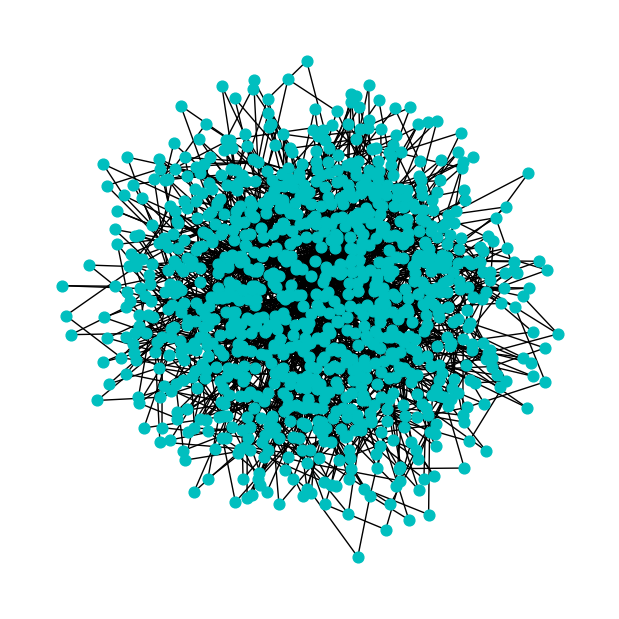

In [16]:
pos = nx.spring_layout(BA)
plt.figure(figsize=(6,6))
nx.draw(BA, pos, node_color='c', node_size=60, with_labels=False)
plt.show()

In [17]:
# number of nodes
BA.order()

1000

In [18]:
# number of edges´plt.bar(deg, cnt, width=0.80, color='b')
BA.size()

1996

In [19]:
# average degree
2*BA.number_of_edges() / float(BA.number_of_nodes())

3.992

In [20]:
## Sorted nodes by degree
sorted(BA.degree, key=lambda x: x[1], reverse=True)[0:8]

[(2, 90), (5, 86), (4, 68), (0, 60), (7, 33), (10, 32), (29, 30), (9, 27)]

In [21]:
# node with the largest degree
node_highest_degree, degree = sorted(BA.degree, key=lambda x: x[1], reverse=True)[0]
node_highest_degree

2

In [22]:
# neighbors
list(BA.neighbors(node_highest_degree))[1:10]

[3, 4, 6, 7, 11, 13, 14, 17, 23]

In [23]:
### Ego network
EGO_HIGHEST = nx.ego_graph(BA, node_highest_degree)

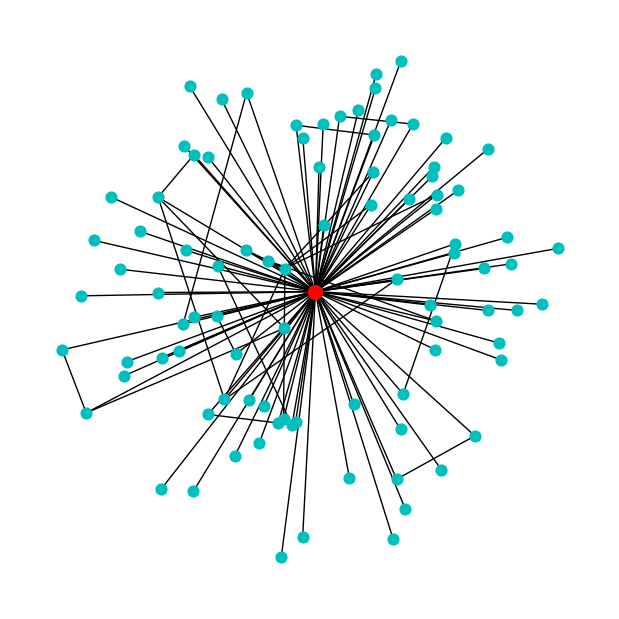

In [24]:
# Draw ego_network
os = nx.spring_layout(EGO_HIGHEST)
plt.figure(figsize=(6,6))
nx.draw(EGO_HIGHEST, pos, node_color='c', node_size=60)
nx.draw_networkx_nodes(EGO_HIGHEST, pos, nodelist=[node_highest_degree], node_size=100, node_color="r")
plt.show()

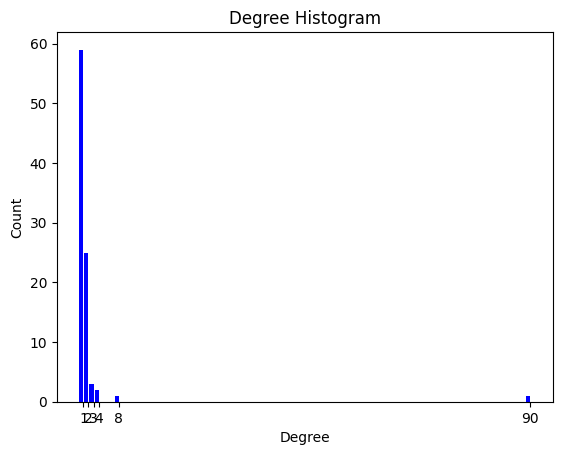

In [25]:
plot_degree_histogram(EGO_HIGHEST)

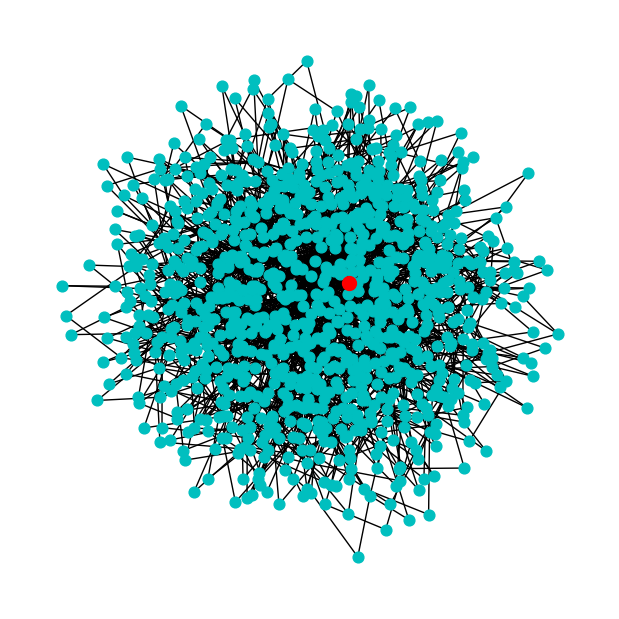

In [27]:
## Ego network 2 hops
EGO_HIGHEST_2 = nx.ego_graph(BA, node_highest_degree, radius=4)
os = nx.spring_layout(EGO_HIGHEST_2)
plt.figure(figsize=(6,6))
nx.draw(EGO_HIGHEST_2, pos, node_color='c', node_size=60)
nx.draw_networkx_nodes(EGO_HIGHEST_2, pos, nodelist=[node_highest_degree], node_size=100, node_color="r")
plt.show()

## Licence

The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© Carlos A. Iglesias, Universidad Politécnica de Madrid.